In [14]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv('mechanical_machine_fault_data.csv')
df.head()

,Machine_ID,RPM,Temperature_C,Vibration_mm_s,Oil_Quality_Index,Pressure_bar,Shaft_Misalignment_deg,Noise_dB,Load_%,Ambient_Temp_C,Humidity_%,Power_kW,Maintenance_Score,Operating_Hours,Fault
0,M4,1521,77.987529,1.632913,65.212943,6.146028,0.466323,65.447683,71.627966,17.513838,50.153923,51.868267,8,6566,0
1,M5,1645,67.482090,2.040998,75.737674,2.162494,0.434798,71.827039,84.950303,28.632558,28.281687,48.687122,7,8913,0
2,M3,1596,70.736424,2.228640,97.921443,4.983390,0.578073,52.806399,56.870315,28.468531,50.270604,56.406917,6,5190,0
3,M5,1544,86.484457,2.727911,93.419708,4.894181,0.469219,58.873687,73.939752,32.922472,33.521277,40.551483,2,4340,1
4,M5,1341,76.132704,2.352253,59.407108,4.546364,0.435923,48.107842,61.977282,21.049915,43.624499,47.894349,6,9112,0


**Select Features**
- Based on your analysis:
- Keep: Temperature_C, Vibration_mm_s, Oil_Quality_Index
- Drop: RPM (not statistically significant)

**Train-Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

X = df[['Temperature_C', 'Vibration_mm_s', 'Oil_Quality_Index', 'RPM', 'Pressure_bar','Shaft_Misalignment_deg','Noise_dB','Load_%', 'Power_kW']]
y = df['Fault']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Scale feature:**

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Build & Evaluate model:**

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
# Logistic Regression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
y_pred = lr.predict(X_test_scaled)
log_reg_accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", log_reg_accuracy)

# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred = rf.predict(X_test_scaled)
rf_accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy:", rf_accuracy)
# Support Vector Classifier
svc = SVC(kernel='linear', random_state=42)
svc.fit(X_train_scaled, y_train)
y_pred = svc.predict(X_test_scaled)
svc_accuracy = accuracy_score(y_test, y_pred)
print("SVC Accuracy:", svc_accuracy)
# Evaluate the models
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred)) 
print(classification_report(y_test, y_pred))
# Evaluate the models   
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
# Evaluate the models
print("SVC Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Logistic Regression Accuracy: 0.92
Random Forest Accuracy: 0.96
SVC Accuracy: 0.905
Logistic Regression Accuracy: 0.905
[[181   0]
 [ 19   0]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       181
           1       0.00      0.00      0.00        19

    accuracy                           0.91       200
   macro avg       0.45      0.50      0.48       200
weighted avg       0.82      0.91      0.86       200

Random Forest Accuracy: 0.905
[[181   0]
 [ 19   0]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       181
           1       0.00      0.00      0.00        19

    accuracy                           0.91       200
   macro avg       0.45      0.50      0.48       200
weighted avg       0.82      0.91      0.86       200

SVC Accuracy: 0.905
[[181   0]
 [ 19   0]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       18

e:\own\capstone\mfa\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\own\capstone\mfa\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\own\capstone\mfa\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\own\capstone\mfa\lib\site-packages\sklearn\metrics\_

**Compare Models:**

In [18]:
results = {
    "Model": ["Logistic Regression", "Random Forest", "SVM"],
    "Accuracy": [log_reg_accuracy, rf_accuracy, svc_accuracy],
}
results_df = pd.DataFrame(results)
results_df.to_csv('model_comparison_results.csv', index=False)


**Plot Confusion Matrix python**

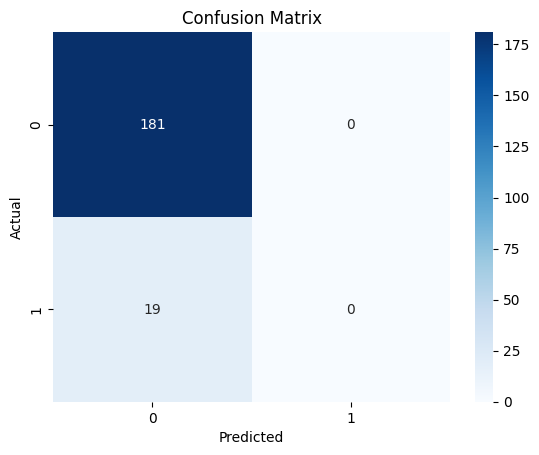

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


** Accuracy is misleading: While all models show ~90% accuracy, they're only predicting the majority class (0).** 

- Precision/Recall for class 1 are zero: Models never predict any positives (class 1), so:

- Recall for class 1 = 0.00

- F1-score for class 1 = 0.00

- ll models fail to identify faulty cases (class 1), which are likely more critical.



**Oversampling**

In [21]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train_scaled, y_train)

In [22]:
LogisticRegression(class_weight='balanced')
RandomForestClassifier(class_weight='balanced')

RandomForestClassifier(class_weight='balanced')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE

# Load dataset
df = pd.read_csv('mechanical_machine_fault_data.csv')

# Features and Target
X = df[['Temperature_C', 'Vibration_mm_s', 'Oil_Quality_Index', 'RPM', 'Pressure_bar',
        'Shaft_Misalignment_deg', 'Noise_dB', 'Load_%', 'Power_kW']]
y = df['Fault']

# Train-test split BEFORE SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE on the training set only
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train_scaled, y_train)

# Train models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "SVC": SVC(probability=True)
}

for name, model in models.items():
    model.fit(X_resampled, y_resampled)
    y_pred = model.predict(X_test_scaled)

    print(f"\nModel: {name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("=" * 50)



Model: Logistic Regression
Accuracy: 0.825
Confusion Matrix:
 [[150  31]
 [  4  15]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.83      0.90       181
           1       0.33      0.79      0.46        19

    accuracy                           0.82       200
   macro avg       0.65      0.81      0.68       200
weighted avg       0.91      0.82      0.85       200


Model: Random Forest
Accuracy: 0.905
Confusion Matrix:
 [[169  12]
 [  7  12]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.93      0.95       181
           1       0.50      0.63      0.56        19

    accuracy                           0.91       200
   macro avg       0.73      0.78      0.75       200
weighted avg       0.92      0.91      0.91       200


Model: SVC
Accuracy: 0.885
Confusion Matrix:
 [[167  14]
 [  9  10]]
Classification Report:
               precision    recall  f1-

In [ ]:

import joblib

# Save the trained model
joblib.dump(rf, 'random_forest_model.pkl')

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')

# Save the list of selected features (used for inference)
selected_features = ['Temperature_C', 'Vibration_mm_s', 'Oil_Quality_Index', 'RPM', 'Pressure_bar',
        'Shaft_Misalignment_deg', 'Noise_dB', 'Load_%', 'Power_kW']
joblib.dump(selected_features, 'selected_features.pkl')


['selected_features.pkl']

In [ ]:
# Load the saved model, scaler, and selected features
model = joblib.load('random_forest_model.pkl')
scaler = joblib.load('scaler.pkl')
selected_features = joblib.load('selected_features.pkl')

# Example new data (replace values with actual input)
new_data = pd.DataFrame([{
    'Temperature_C': 75,
    'Vibration_mm_s': 2.5,
    'Oil_Quality_Index': 88,
    'RPM': 1500,
    'Pressure_bar': 5.2,
    'Shaft_Misalignment_deg': 0.3,
    'Noise_dB': 70,
    'Load_%': 85,
    'Power_kW': 12.5
}])

# Ensure the feature order and selection is consistent
new_data = new_data[selected_features]

# Scale the data
scaled_data = scaler.transform(new_data)

# Make prediction
prediction = model.predict(scaled_data)
prediction_proba = model.predict_proba(scaled_data)

# Output the predicted class and its probability
print("Predicted Class:", prediction[0])
print("Class Probabilities:", prediction_proba[0])


Predicted Class: 0
Class Probabilities: [1. 0.]
